# *Data Science Salaries*

In [8]:
# importa le librerie utili alla nostra analisi (preferibilmente in ordine alfabetico come previsto dal PEP 8)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

Carichiamo i dati:

In [32]:
# se il file non viene caricato stampare un messaggio
try:
    data = pd.read_csv('ds_salaries.csv')
except FileNotFoundError:
    print("File ds_salaries.csv non trovato.")
    sys.exit()

Mostriamo le prime 10 righe del nostro file:

In [33]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


Abbiamo calcolato i parametri statistici del reddito annuo in USD: media, quartili (primo, secondo e terzo), minimo e massimo. 

In [34]:
data.describe()['salary_in_usd']

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [35]:
print('Il reddito annuo minimo è pari a', data.salary_in_usd.min(), 'euro, mentre il reddito annuo massimo è', data.salary_in_usd.max(),'euro')

Il reddito annuo minimo è pari a 5132 euro, mentre il reddito annuo massimo è 450000 euro


# *Distribuzione del reddito annuo in base al livello di esperienza lavorativa*

Nel grafico sottostante mostriamo la rappresentazione grafica attraverso i boxplot (diagramma a scatola e baffi) il reddito annuo suddiviso per i quattro livelli di esperienza lavorativa:

* EN: Entry-level / Junior;

* MI: Mid-level / Intermediate;

* SE: Senior-level / Expert;

* EX: Executive-level / Director.

Ciascun rettangolo (scatola) è delimitato dal primo e dal terzo quartile, e diviso al suo interno dalla mediana (secondo quartile). I segmenti (baffi) indicano il minimo e il massimo valore del reddito annuo, mentre i punti rappresentano gli outliers (valori "anomali", perché distanti dalle altre osservazioni).
Pertanto, osservando il grafico è evidente che la media è influenzata dagli outliers e che differisce dalla mediana (secondo quartile).
Tutto sommato è evidente che il reddito aumenta al crescere dell'esperienza di lavoro, come mostrato anche nel grafico succesivo.

Text(0, 0.5, 'Reddito annuo in USD')

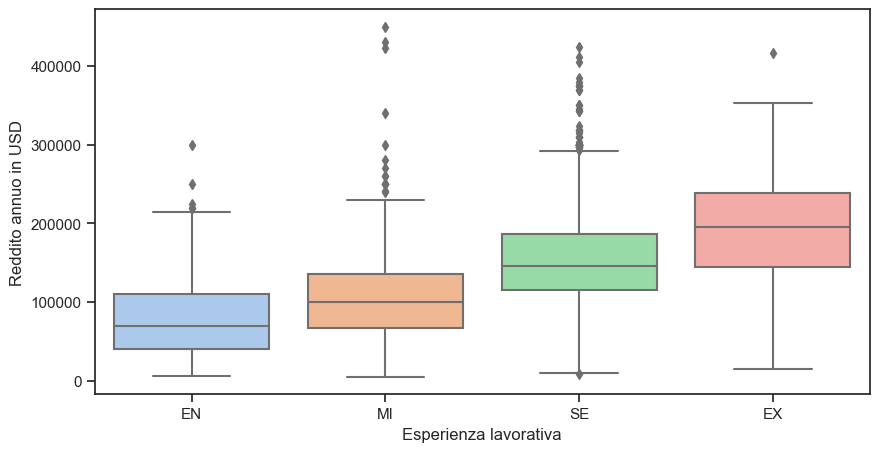

In [36]:
# crea con seaborn il grafico diagramma a scatola e baffi 
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=data, x='experience_level', y='salary_in_usd', order=['EN','MI','SE','EX'])


# metti le etichette agli assi x e y
plt.xlabel('Esperienza lavorativa')
plt.ylabel('Reddito annuo in USD')

# *Influenza del livello di esperienza sul reddito medio annuo*

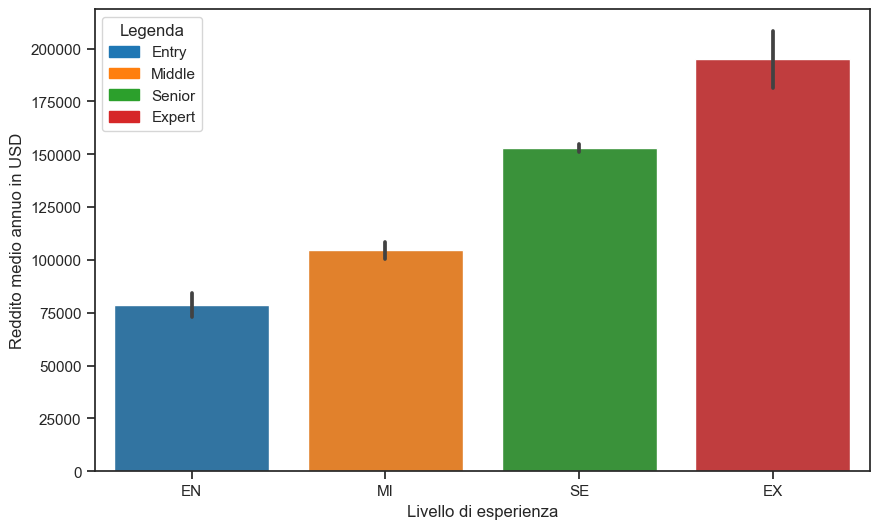

In [37]:
#crea grafico a barre
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=data, palette=colors, order=['EN','MI','SE','EX'])
plt.xlabel('Livello di esperienza')
plt.ylabel('Reddito medio annuo in USD')

# personalizza legenda
legend_labels = ['Entry', 'Middle', 'Senior','Expert']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Legenda', loc=2)

# mostra il grafico
plt.show()


# *Distribuzione del reddito annuo in base al livello di esperienza dei lavoratori*

Text(0, 0.5, 'Numero di lavoratori')

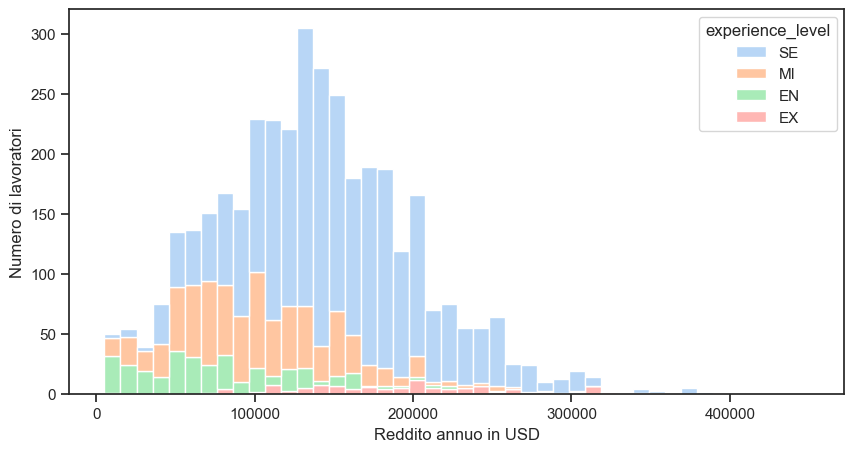

In [38]:
# crea un istogramma 
ax=sns.histplot(data=data, x = 'salary_in_usd', color='pink', hue='experience_level', multiple='stack')
plt.xlabel('Reddito annuo in USD')
plt.ylabel('Numero di lavoratori')


# *Distribuzione del reddito annuo in base al tipo di contratto*

Di seguito viene mostrata la distribuzione del reddito annuo in base ai quattro tipi di contratto:

PT : Part-time;

FT : Full-time;

CT : Contract;

FL : Freelance.

Come nel grafico al punto 13 vengono messi in evidenza i quartili, il minimo e il massimo del reddito annuo in base al tipo di contratto. E' evidente che i lavoratori con il contratto Full-Time guadagnano di più rispetto ai lavoratori Part-Time.


Text(0.5, 0, 'Tipo di contratto')

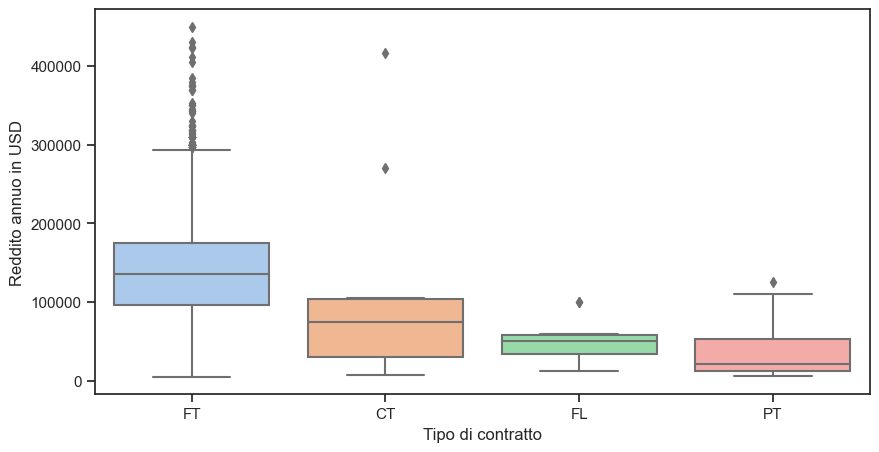

In [39]:
# crea i boxplot 
sns.boxplot(data=data, x='employment_type', y='salary_in_usd')
sns.set_theme(style="ticks", palette="pastel")

# metti le etichette agli assi x e y
plt.ylabel('Reddito annuo in USD')
plt.xlabel('Tipo di contratto')

# *Distribuzione dei redditi annui in base al livello di esperienza dei lavoratori e alla dimensione delle imprese*

Text(0.5, 0, 'Dimensione di impresa')

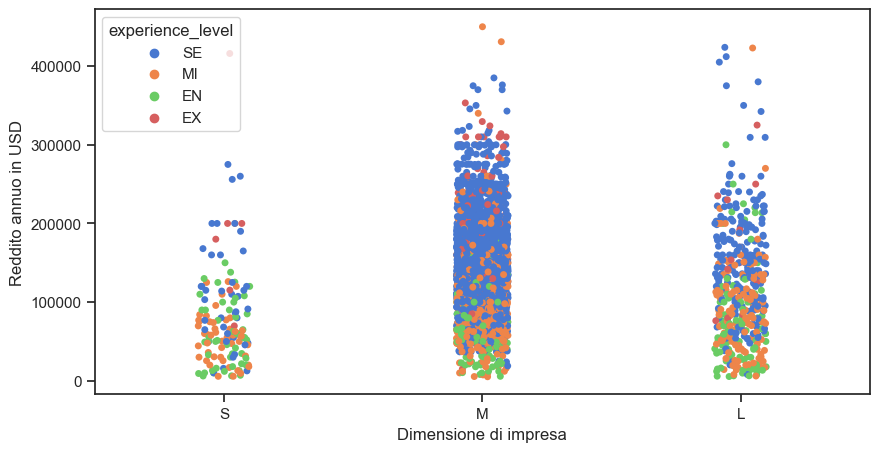

In [40]:
# crea grafico diagramma a punti
sns.stripplot(data=data, x='company_size', y='salary_in_usd', hue='experience_level', palette = 'muted', order=['S', 'M', 'L'])
plt.ylabel('Reddito annuo in USD')
plt.xlabel('Dimensione di impresa')


# *Impatto della dimensione delle imprese sul reddito annuo dei lavoratori*

Le imprese di medie dimensioni tendono a offrire redditi medi annui più alti, suggerendo un equilibrio ottimale tra risorse e flessibilità rispetto alle imprese di dimensioni più grandi o più piccole.

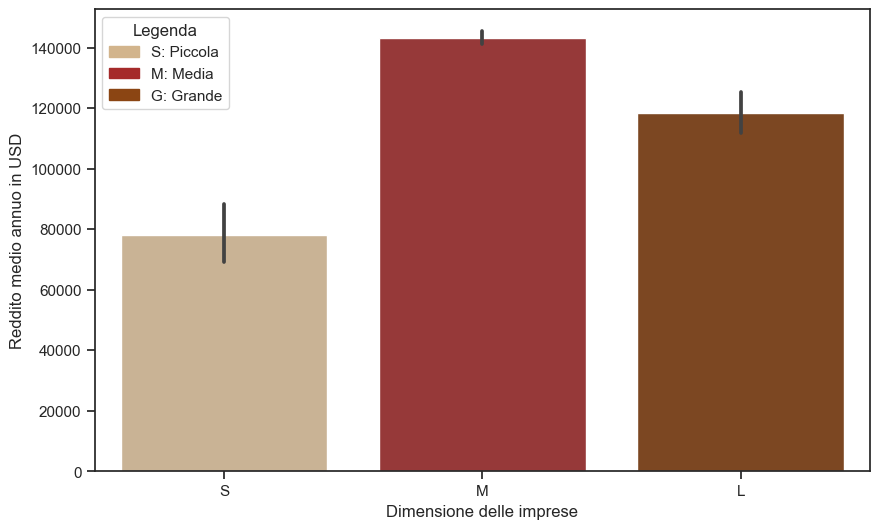

In [41]:
# crea grafico a barre 
plt.figure(figsize=(10, 6))
colors_five = sfumature_di_marrone_chiaro = sfumature_di_marrone = ['#D2B48C', '#A52A2A', '#8B4513']
sns.barplot(x='company_size', y='salary_in_usd', data=data, palette=colors_five, order=['S', 'M', 'L'])
plt.xlabel('Dimensione delle imprese')
plt.ylabel('Reddito medio annuo in USD')

# personalizza legenda
legend_labels = ['S: Piccola', 'M: Media', 'G: Grande']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors_five[i], label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Legenda', loc=2)

# mostra il grafico
plt.show()


# *Reddito annuo in base alla modalità di lavoro*

Gli impiegati che lavorano in sede percepiscono un reddito mediamente (leggermente) più alto rispetto a chi lavora in smart-working. Sembrebbero essere meno fortunati i dipendenti che lavorano in modalità ibrida (svolgono attività lavorativa sia in ufficio sia da casa) in quanto percepiscono un reddito decisamente più basso.

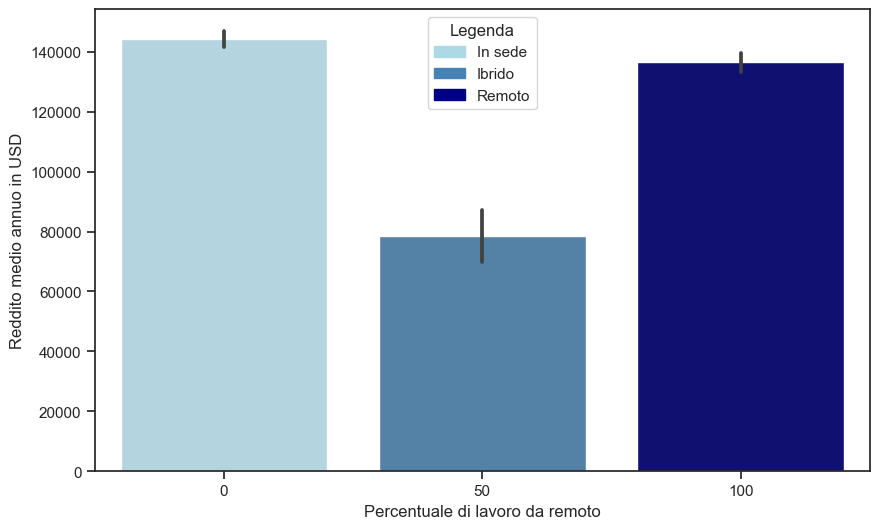

In [42]:
# crea grafico a barre 
colors_three = shades_of_blue = ['#ADD8E6', '#4682B4', '#000080']
plt.figure(figsize=(10, 6))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=data, palette=colors_three)
plt.xlabel('Percentuale di lavoro da remoto')
plt.ylabel('Reddito medio annuo in USD')

# personalizza legenda
legend_labels = ['In sede', 'Ibrido', 'Remoto']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors_three[i], label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Legenda', loc=9)

# mostra il grafico
plt.show()

# *Percentuali in base alla tipologia di contratto di lavoro*

Il 99% dei dipendenti ha lavorato con contratto Full-Time, mentre il restante 1% dei dipendenti ha lavorato con contratto Part-time, Contract e Freelance.

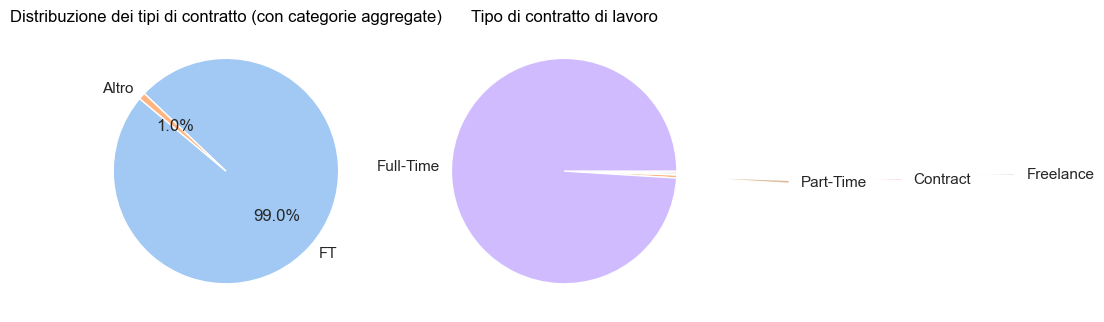

In [43]:
# subplot del primo grafico a torta
plt.subplot(1, 2, 2)
group = data['employment_type'].value_counts()
plt.pie(group)
etichette = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']
plt.pie(group, labels=etichette, explode=[0,1,2,3])
plt.title('Tipo di contratto di lavoro', color = 'black')

#subplot del secondo grafico a torta
plt.subplot(1, 2, 1)
grouped_data = data.groupby(['employment_type', 'company_size']).size().unstack().fillna(0)
employment_type_totals = grouped_data.sum(axis=1)
grouped_totals = employment_type_totals.copy()
grouped_totals['Altro'] = grouped_totals['CT'] + grouped_totals['FL'] + grouped_totals['PT']
grouped_totals = grouped_totals.drop(['CT', 'FL', 'PT'])
grouped_percentages = grouped_totals / grouped_totals.sum() * 100
grouped_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title('Distribuzione dei tipi di contratto (con categorie aggregate)', color = 'black')
plt.ylabel('')  # nascondi etichetta dell'asse y

# mostra i grafici
plt.show()

Nel grafico "Distribuzione dei tipi di contratto (con categorie aggregate)" la voce "Altro" raggruppa: Part-Time, Contract e Freelance.

# *Percentuale relativa al livello di esperienza dei lavoratori*

Tra il 2020 e il 2023 sono stati registati più lavoratori "Senior" seguiti in ordine decrescente dai lavoratori "Middle", "Entry" ed "Expert".

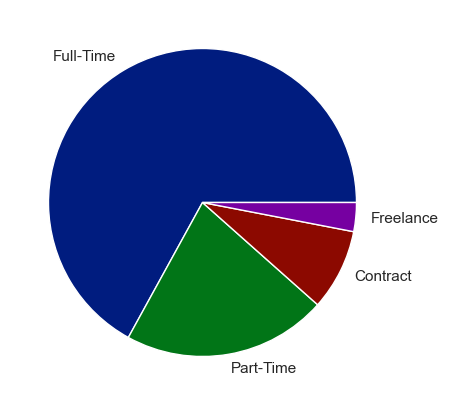

In [44]:
# crea grafico a torta 
plt.style.use('seaborn-v0_8-dark-palette')
seniority=data['experience_level'].value_counts()
plt.pie(seniority, labels=etichette)
plt.rcParams['figure.figsize'] = [10, 5]
etichette = ['Senior', 'Middle', 'Entry', 'Expert']

# mostra il grafico
plt.show()

# *Andamento del reddito medio annuo tra il 2020 e il 2023*

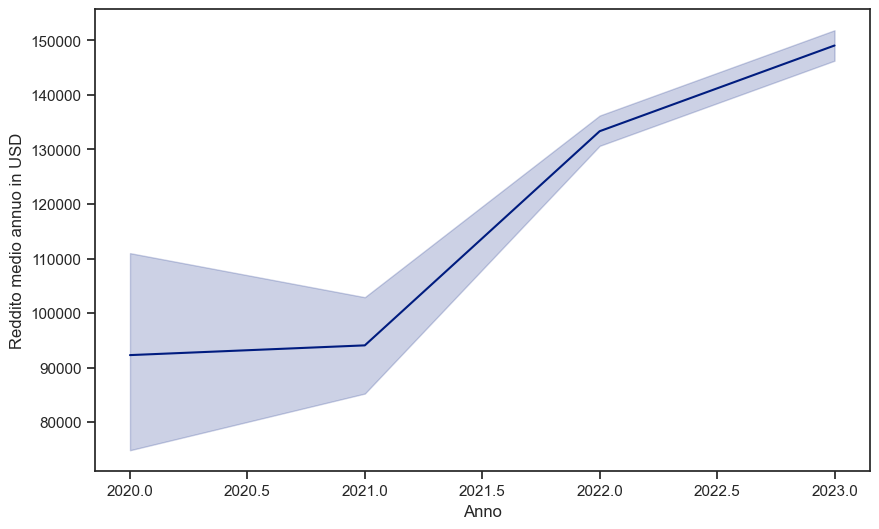

In [45]:
# crea grafico a linea
plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=data)
plt.xlabel('Anno')
plt.ylabel('Reddito medio annuo in USD')

# mostra il grafico
plt.show()

# *Variazione temporale dei redditi annui in base al livello di esperienza (solo lavoratori full-time)*

Il grafico mette in luce che dal 2020 al 2023 il reddito annuo percepito dai lavoratori è aumentato. 

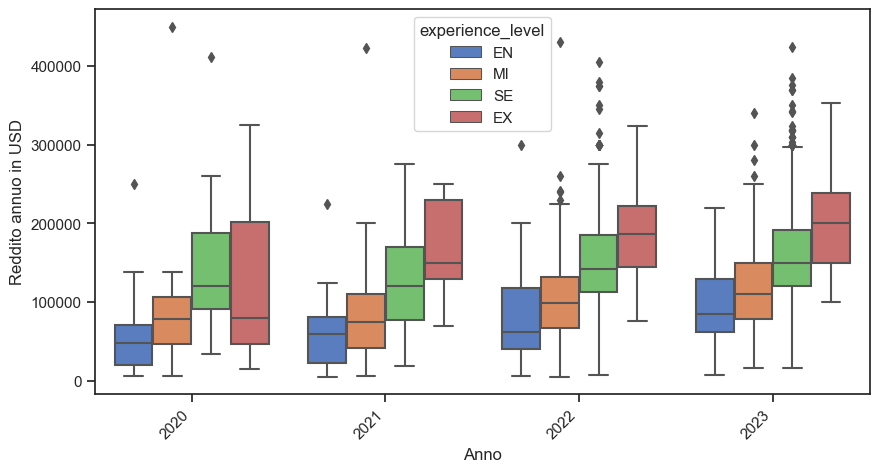

In [46]:
# crea grafico boxplot 
sns.boxplot(data=data[data['employment_type']=='FT'], x='work_year', y='salary_in_usd', hue = 'experience_level', palette='muted', hue_order=['EN','MI','SE','EX'])
plt.xticks(rotation=45, ha ='right')
plt.xlabel('Anno')
plt.ylabel('Reddito annuo in USD')

# mostra il grafico
plt.show()

# *Numero di impiegati per ciascuna posizione lavorativa (top 10)*

Il grafico mostra che le posizioni lavorative maggiormente ricoperte sono Data Engineer, Data Scientist e Data Analyst (le prime tre da sinistra).

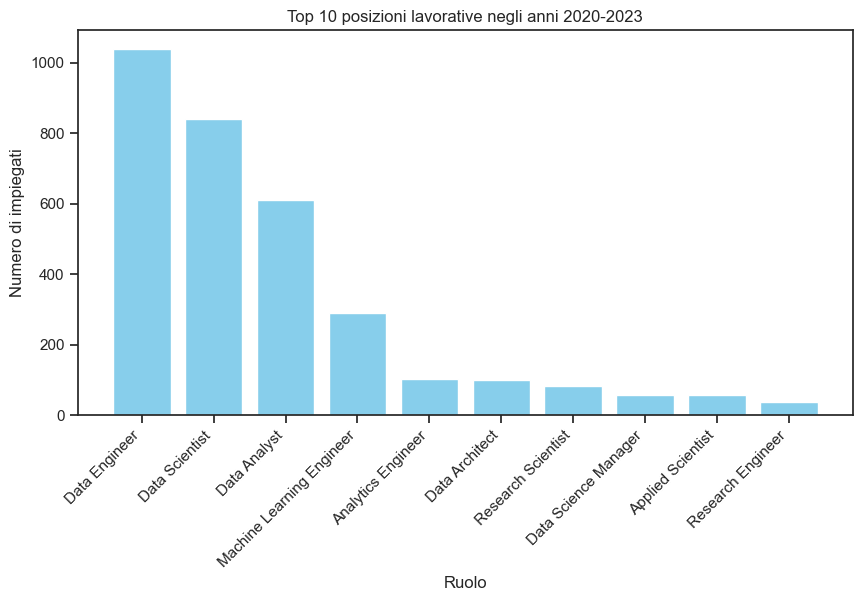

In [47]:
# le prime 10 professioni con il maggior numero di impiegati 
top10_job_titles = data['job_title'].value_counts()[:10]

# crea grafico a barre
plt.bar(top10_job_titles.index, top10_job_titles.values, color='skyblue')
plt.title('Top 10 posizioni lavorative negli anni 2020-2023')
plt.xlabel('Ruolo')
plt.ylabel('Numero di impiegati')
plt.xticks(rotation=45, ha='right')

# mostra il grafico
plt.show()

# *Confronto tra luogo di residenza degli impiegati e l'ubificazione delle imprese*

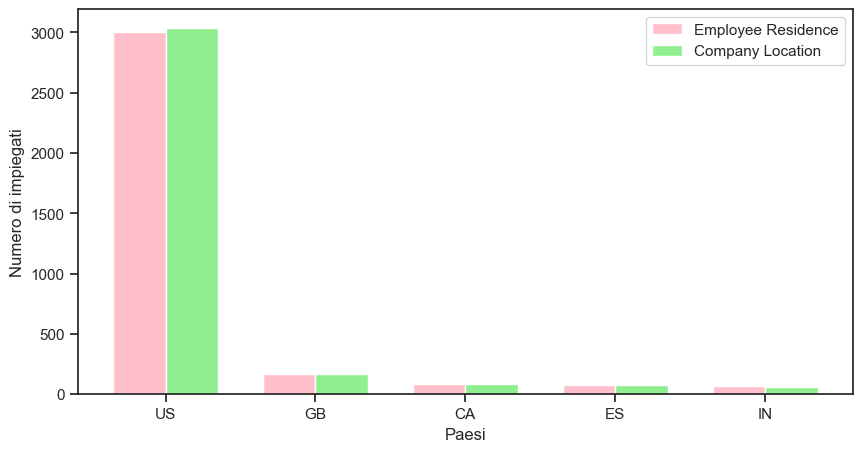

In [48]:
# i primi 5 paesi con maggior numero di impiegati
_5_residence = data['employee_residence'].value_counts()[:5]
_5_company_location = data['company_location'].value_counts()[:5]

# crea grafico a barre
bar_width = 0.35
index = np.arange(len(_5_residence.index))
fig, ax = plt.subplots()
bar1 = ax.bar(index, _5_residence.values, bar_width, label='Employee Residence', color='pink')
bar2 = ax.bar(index + bar_width, _5_company_location.values, bar_width, label='Company Location', color='lightgreen')
ax.set_xlabel('Paesi')
ax.set_ylabel('Numero di impiegati')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(_5_residence.index)
ax.legend()

# mostra il grafico
plt.show()

# * Top 3 figure lavorative*

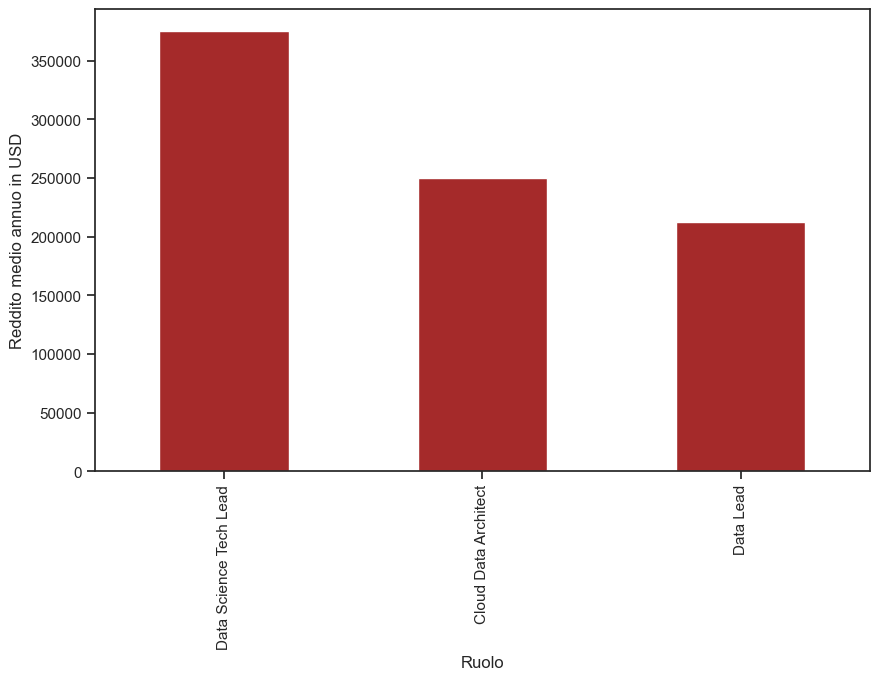

In [49]:
# calcola media dei redditi delle top 3 figure lavorative
media_stipendi_per_figura_lavorativa = data.groupby('job_title')['salary_in_usd'].mean()
figure_top3 = media_stipendi_per_figura_lavorativa.nlargest(3)

# crea grafico a barre
plt.figure(figsize=(10, 6))
figure_top3.plot(kind='bar', color='brown')
plt.xlabel('Ruolo')
plt.ylabel('Reddito medio annuo in USD')

# mostra il grafico
plt.show()

# *Reddito medio annuo per i primi 10 ruoli professionali*

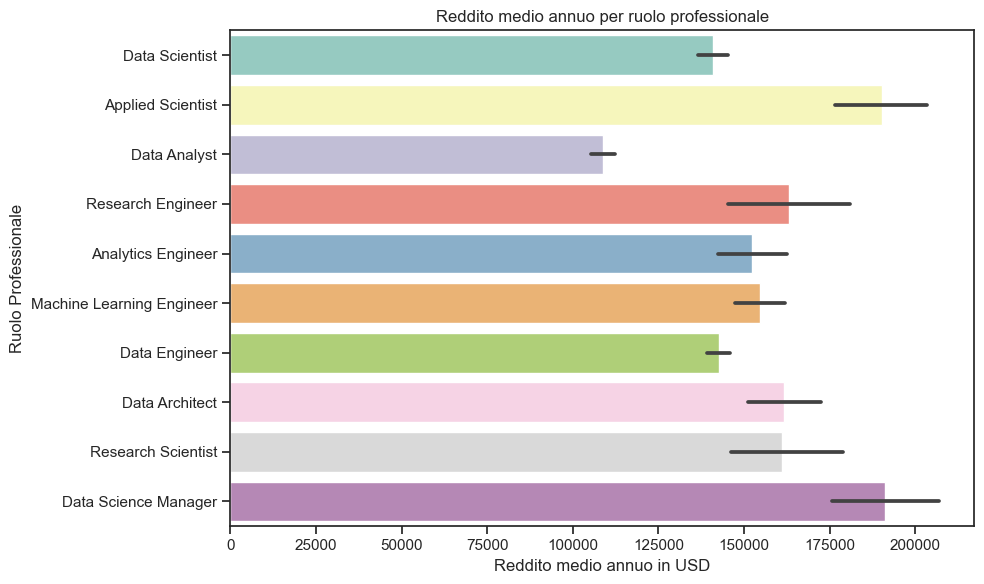

In [50]:
top_roles = data['job_title'].value_counts().head(10).index

# crea grafico a barre 
plt.figure(figsize=(10, 6))
ax = sns.barplot(y='job_title', x='salary_in_usd', data=data[data['job_title'].isin(top_roles)], palette = sns.color_palette("Set3"))
plt.title('Reddito medio annuo per ruolo professionale')
plt.xlabel('Reddito medio annuo in USD')
plt.ylabel('Ruolo Professionale')
plt.tight_layout()

# mostra il grafico
plt.show()